# Student Result Analysis - Complete EDA
## Exploratory Data Analysis & Visualization

**Project By:** Your Name  
**Date:** January 2026  
**Purpose:** Analyzing student exam results to identify factors affecting academic performance

---

## 1. Import Libraries

In [3]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Plot settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


## 2. Load Dataset

In [4]:
# Load the dataset
df = pd.read_csv('Students Exam Result Extended Dataset.csv')

# Drop the first unnamed column if exists
if df.columns[0].startswith('Unnamed'):
    df = df.drop(df.columns[0], axis=1)

print(f"✓ Dataset loaded successfully!")
print(f"Total Records: {len(df)}")
print(f"Total Features: {len(df.columns)}")

✓ Dataset loaded successfully!
Total Records: 30641
Total Features: 14


## 3. Data Overview

In [5]:
# Display first few rows
print("First 5 rows of dataset:")
df.head()

First 5 rows of dataset:


,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [6]:
# Dataset information
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [7]:
# Statistical summary
print("Statistical Summary:")
df.describe()

Statistical Summary:


,NrSiblings,MathScore,ReadingScore,WritingScore
count,29069.000000,30641.000000,30641.000000,30641.000000
mean,2.145894,66.558402,69.377533,68.418622
std,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


In [8]:
# Column names
print("Column Names:")
print(df.columns.tolist())

Column Names:
['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore', 'WritingScore']


In [9]:
# Data types
print("Data Types:")
df.dtypes

Data Types:


Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings             float64
TransportMeans          object
WklyStudyHours          object
MathScore                int64
ReadingScore             int64
WritingScore             int64
dtype: object

## 4. Data Cleaning

In [10]:
# Check for missing values
print("Missing Values:")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

Missing Values:
                     Missing Count  Percentage
TransportMeans                3134   10.228126
ParentEduc                    1845    6.021344
EthnicGroup                   1840    6.005026
TestPrep                      1830    5.972390
NrSiblings                    1572    5.130381
ParentMaritalStatus           1190    3.883685
WklyStudyHours                 955    3.116739
IsFirstChild                   904    2.950295
PracticeSport                  631    2.059332


In [11]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")


Duplicate Rows: 0


In [12]:
# Create a copy for analysis
df_clean = df.copy()

# Add total score column
df_clean['TotalScore'] = df_clean['MathScore'] + df_clean['ReadingScore'] + df_clean['WritingScore']
df_clean['AvgScore'] = df_clean['TotalScore'] / 3

# Add performance category
def categorize_performance(score):
    if score >= 80:
        return 'Excellent'
    elif score >= 60:
        return 'Good'
    elif score >= 40:
        return 'Average'
    else:
        return 'Poor'

df_clean['PerformanceCategory'] = df_clean['AvgScore'].apply(categorize_performance)

print("✓ Data cleaning completed!")
print(f"\nNew columns added: TotalScore, AvgScore, PerformanceCategory")

✓ Data cleaning completed!

New columns added: TotalScore, AvgScore, PerformanceCategory


## 5. Exploratory Data Analysis (EDA)

### 5.1 Gender Distribution

In [13]:
# Gender count
gender_counts = df_clean['Gender'].value_counts()
print("Gender Distribution:")
print(gender_counts)
print(f"\nPercentage:")
print(df_clean['Gender'].value_counts(normalize=True) * 100)

Gender Distribution:
Gender
female    15424
male      15217
Name: count, dtype: int64

Percentage:
Gender
female    50.337783
male      49.662217
Name: proportion, dtype: float64


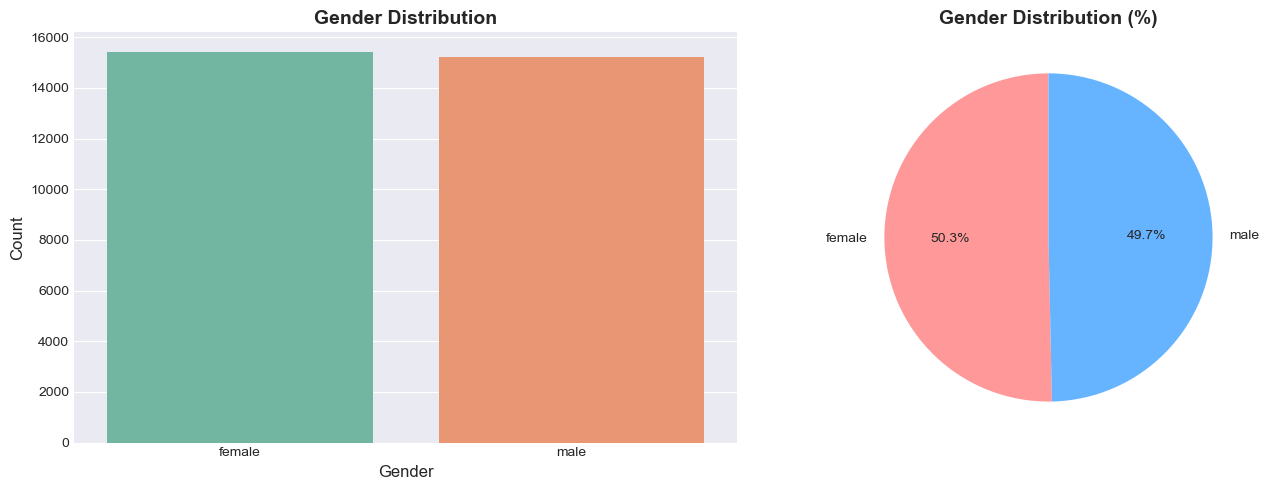

In [14]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df_clean, x='Gender', ax=axes[0], palette='Set2')
axes[0].set_title('Gender Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Gender', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Pie chart
gender_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
axes[1].set_title('Gender Distribution (%)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

### 5.2 Ethnic Group Analysis

In [15]:
# Ethnic group distribution
print("Ethnic Group Distribution:")
print(df_clean['EthnicGroup'].value_counts())

Ethnic Group Distribution:
EthnicGroup
group C    9212
group D    7503
group B    5826
group E    4041
group A    2219
Name: count, dtype: int64


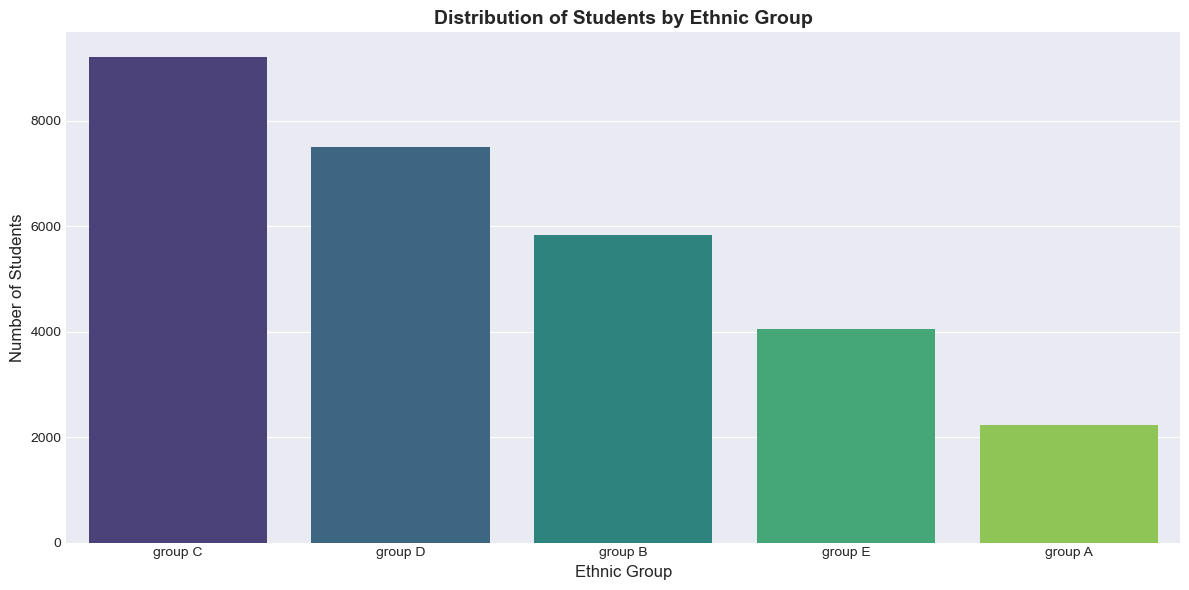

In [16]:
# Visualization
plt.figure(figsize=(12, 6))
sns.countplot(data=df_clean, x='EthnicGroup', order=df_clean['EthnicGroup'].value_counts().index, palette='viridis')
plt.title('Distribution of Students by Ethnic Group', fontsize=14, fontweight='bold')
plt.xlabel('Ethnic Group', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 5.3 Score Distribution Analysis

In [17]:
# Score statistics
print("Score Statistics:")
print(df_clean[['MathScore', 'ReadingScore', 'WritingScore']].describe())

Score Statistics:
          MathScore  ReadingScore  WritingScore
count  30641.000000  30641.000000  30641.000000
mean      66.558402     69.377533     68.418622
std       15.361616     14.758952     15.443525
min        0.000000     10.000000      4.000000
25%       56.000000     59.000000     58.000000
50%       67.000000     70.000000     69.000000
75%       78.000000     80.000000     79.000000
max      100.000000    100.000000    100.000000


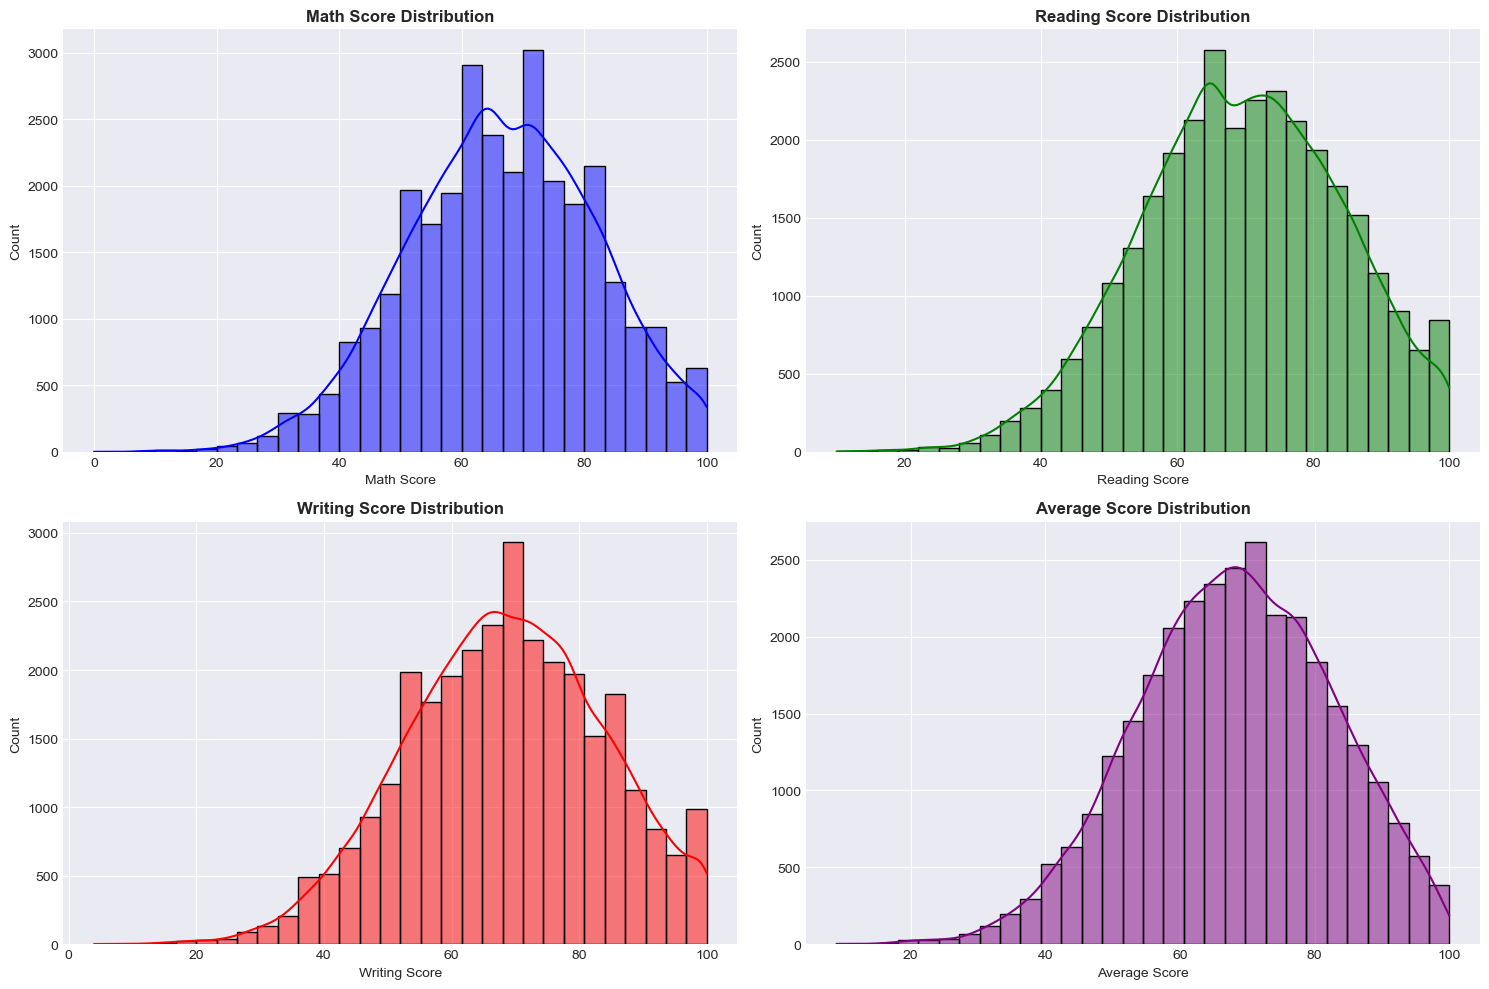

In [18]:
# Distribution plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Math Score
sns.histplot(df_clean['MathScore'], bins=30, kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Math Score Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Math Score')

# Reading Score
sns.histplot(df_clean['ReadingScore'], bins=30, kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Reading Score Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Reading Score')

# Writing Score
sns.histplot(df_clean['WritingScore'], bins=30, kde=True, ax=axes[1, 0], color='red')
axes[1, 0].set_title('Writing Score Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Writing Score')

# Average Score
sns.histplot(df_clean['AvgScore'], bins=30, kde=True, ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Average Score Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Average Score')

plt.tight_layout()
plt.show()

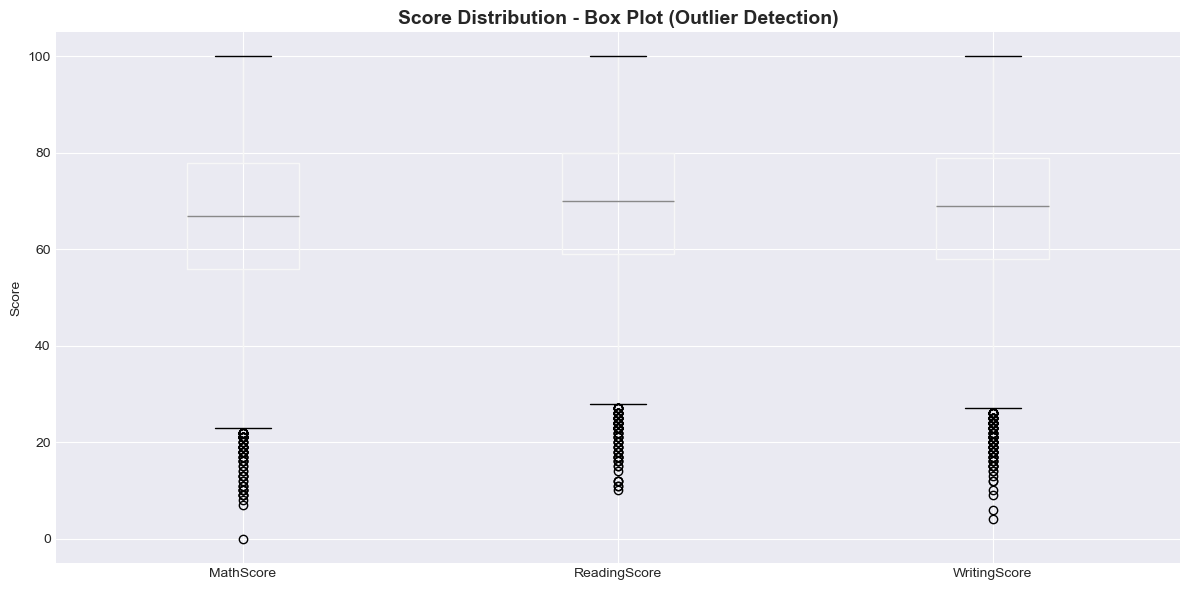

In [19]:
# Box plots for outlier detection
fig, ax = plt.subplots(figsize=(12, 6))
df_clean[['MathScore', 'ReadingScore', 'WritingScore']].boxplot(ax=ax)
ax.set_title('Score Distribution - Box Plot (Outlier Detection)', fontsize=14, fontweight='bold')
ax.set_ylabel('Score')
plt.tight_layout()
plt.show()

### 5.4 Gender vs Performance

In [20]:
# Average scores by gender
gender_performance = df_clean.groupby('Gender')[['MathScore', 'ReadingScore', 'WritingScore', 'AvgScore']].mean().round(2)
print("Average Scores by Gender:")
print(gender_performance)

Average Scores by Gender:
        MathScore  ReadingScore  WritingScore  AvgScore
Gender                                                 
female      64.08         72.85         72.86     69.93
male        69.07         65.85         63.92     66.28


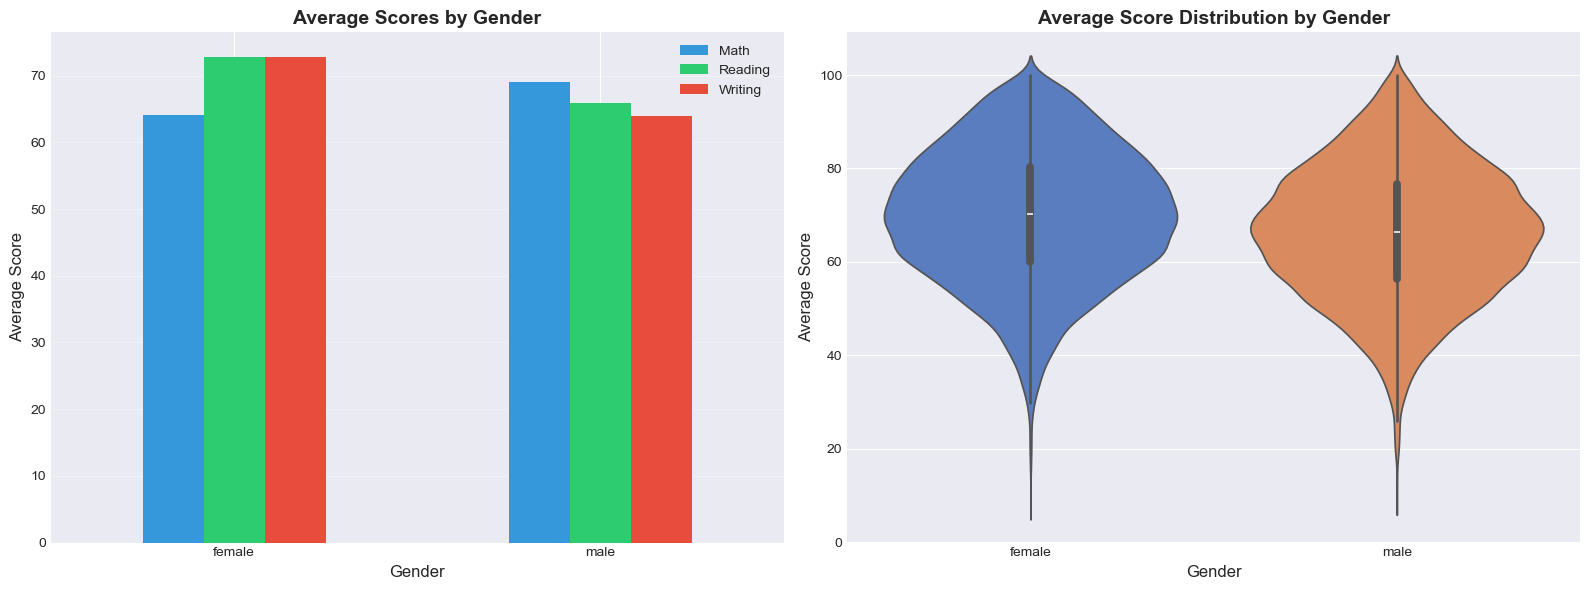

In [21]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot
gender_performance[['MathScore', 'ReadingScore', 'WritingScore']].plot(kind='bar', ax=axes[0], color=['#3498db', '#2ecc71', '#e74c3c'])
axes[0].set_title('Average Scores by Gender', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Gender', fontsize=12)
axes[0].set_ylabel('Average Score', fontsize=12)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].legend(['Math', 'Reading', 'Writing'])
axes[0].grid(axis='y', alpha=0.3)

# Violin plot
sns.violinplot(data=df_clean, x='Gender', y='AvgScore', ax=axes[1], palette='muted')
axes[1].set_title('Average Score Distribution by Gender', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Gender', fontsize=12)
axes[1].set_ylabel('Average Score', fontsize=12)

plt.tight_layout()
plt.show()

### 5.5 Test Preparation Impact

In [22]:
# Test prep distribution
print("Test Preparation Distribution:")
print(df_clean['TestPrep'].value_counts())

# Performance comparison
testprep_performance = df_clean.groupby('TestPrep')[['MathScore', 'ReadingScore', 'WritingScore', 'AvgScore']].mean().round(2)
print("\nAverage Scores by Test Preparation:")
print(testprep_performance)

Test Preparation Distribution:
TestPrep
none         18856
completed     9955
Name: count, dtype: int64

Average Scores by Test Preparation:
           MathScore  ReadingScore  WritingScore  AvgScore
TestPrep                                                  
completed      69.55         73.73         74.70     72.66
none           64.95         67.05         65.09     65.70


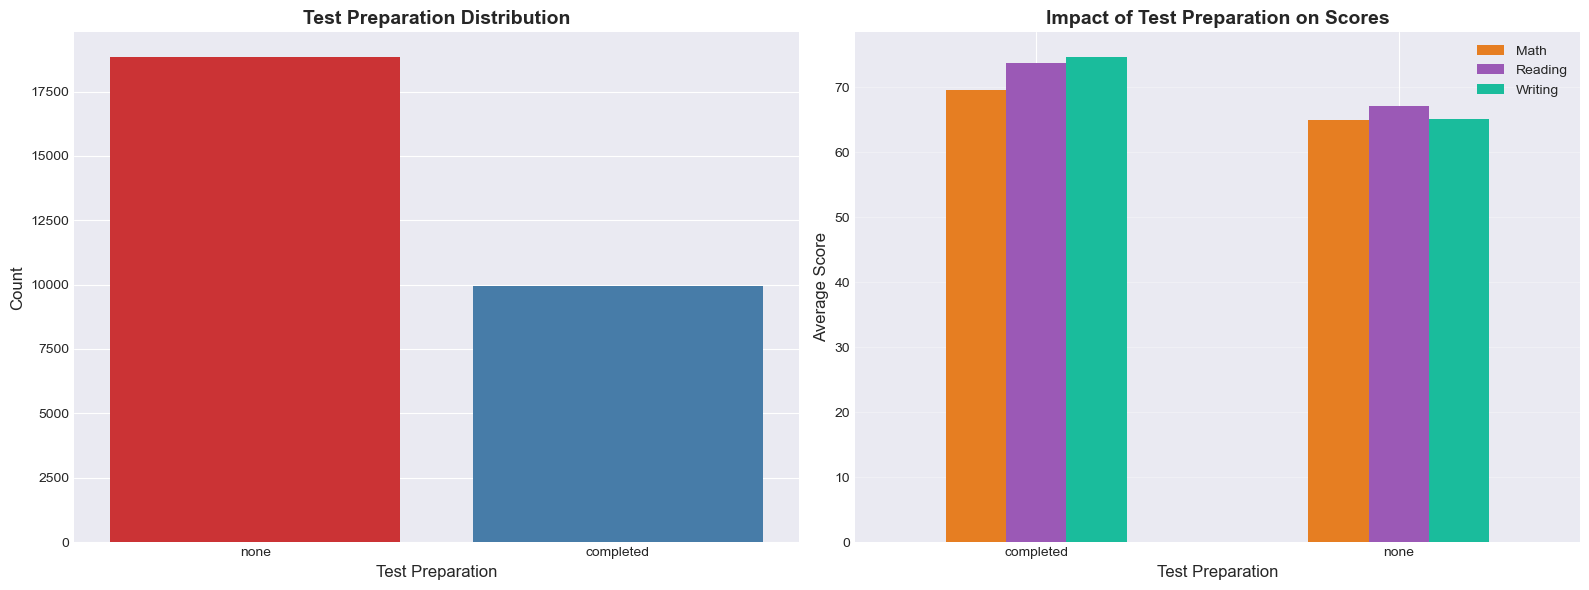

In [23]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Count plot
sns.countplot(data=df_clean, x='TestPrep', ax=axes[0], palette='Set1')
axes[0].set_title('Test Preparation Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Test Preparation', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Performance comparison
testprep_performance[['MathScore', 'ReadingScore', 'WritingScore']].plot(kind='bar', ax=axes[1], color=['#e67e22', '#9b59b6', '#1abc9c'])
axes[1].set_title('Impact of Test Preparation on Scores', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Test Preparation', fontsize=12)
axes[1].set_ylabel('Average Score', fontsize=12)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].legend(['Math', 'Reading', 'Writing'])
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 5.6 Lunch Type Impact

In [24]:
# Lunch type analysis
lunch_performance = df_clean.groupby('LunchType')[['MathScore', 'ReadingScore', 'WritingScore', 'AvgScore']].mean().round(2)
print("Average Scores by Lunch Type:")
print(lunch_performance)

Average Scores by Lunch Type:
              MathScore  ReadingScore  WritingScore  AvgScore
LunchType                                                    
free/reduced      58.86         64.19         62.65     61.90
standard          70.71         72.18         71.53     71.47


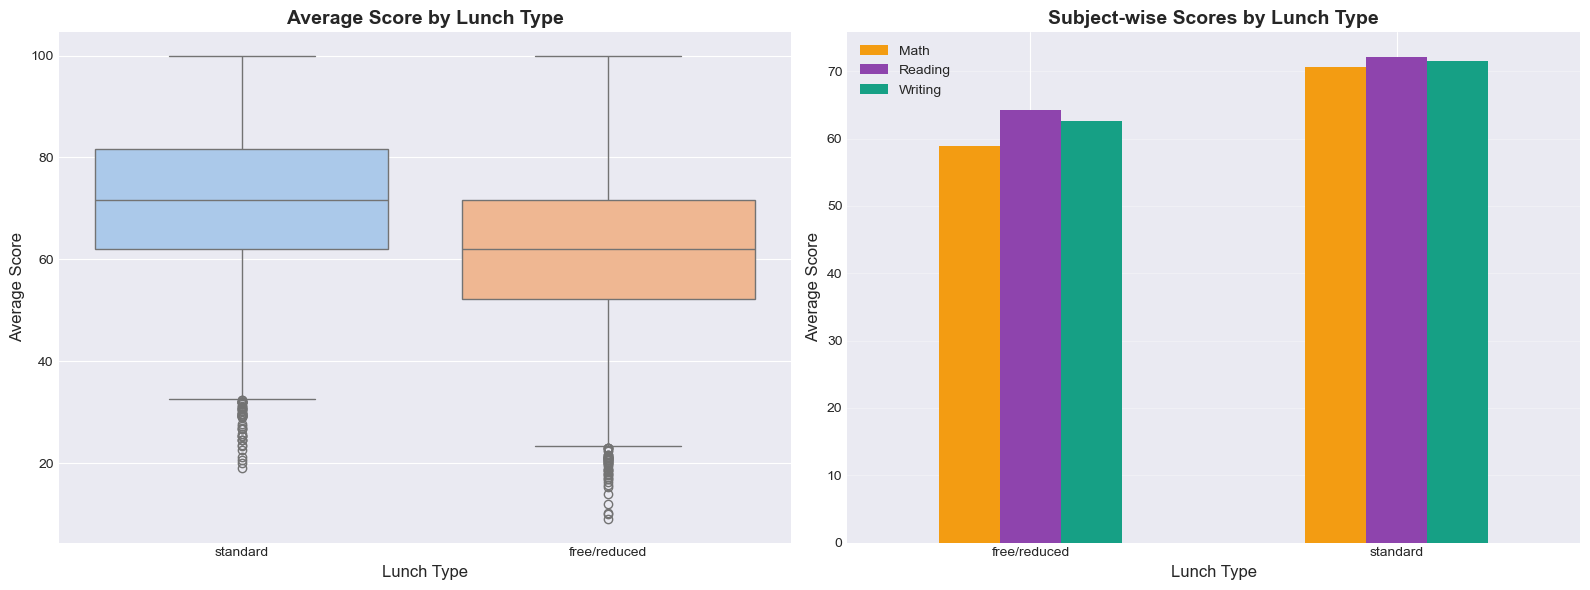

In [25]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot
sns.boxplot(data=df_clean, x='LunchType', y='AvgScore', ax=axes[0], palette='pastel')
axes[0].set_title('Average Score by Lunch Type', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Lunch Type', fontsize=12)
axes[0].set_ylabel('Average Score', fontsize=12)

# Bar plot
lunch_performance[['MathScore', 'ReadingScore', 'WritingScore']].plot(kind='bar', ax=axes[1], color=['#f39c12', '#8e44ad', '#16a085'])
axes[1].set_title('Subject-wise Scores by Lunch Type', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Lunch Type', fontsize=12)
axes[1].set_ylabel('Average Score', fontsize=12)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].legend(['Math', 'Reading', 'Writing'])
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 5.7 Parent Education Level Impact

In [26]:
# Parent education analysis
parent_edu_performance = df_clean.groupby('ParentEduc')[['AvgScore']].mean().round(2).sort_values('AvgScore', ascending=False)
print("Average Score by Parent Education Level:")
print(parent_edu_performance)

Average Score by Parent Education Level:
                    AvgScore
ParentEduc                  
master's degree        74.84
bachelor's degree      72.29
associate's degree     69.93
some college           68.02
high school            65.69
some high school       63.91


<Figure size 1400x600 with 0 Axes>

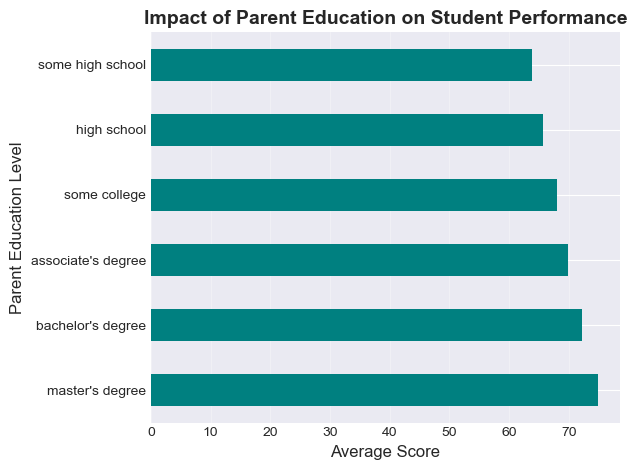

In [27]:
# Visualization
plt.figure(figsize=(14, 6))
parent_edu_performance.plot(kind='barh', color='teal', legend=False)
plt.title('Impact of Parent Education on Student Performance', fontsize=14, fontweight='bold')
plt.xlabel('Average Score', fontsize=12)
plt.ylabel('Parent Education Level', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### 5.8 Study Hours Impact

In [ ]:
# Study hours analysis
study_hours_performance = df_clean.groupby('WklyStudyHours')[['AvgScore']].mean().round(2).sort_values('AvgScore', ascending=False)
print("Average Score by Weekly Study Hours:")
print(study_hours_performance)

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=df_clean, x='WklyStudyHours', y='AvgScore', order=['< 5', '5 - 10', '> 10'], palette='coolwarm')
plt.title('Impact of Weekly Study Hours on Performance', fontsize=14, fontweight='bold')
plt.xlabel('Weekly Study Hours', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.tight_layout()
plt.show()

### 5.9 Sports Practice Impact

In [ ]:
# Sports practice analysis
sports_performance = df_clean.groupby('PracticeSport')[['MathScore', 'ReadingScore', 'WritingScore', 'AvgScore']].mean().round(2)
print("Average Scores by Sports Practice:")
print(sports_performance)

In [ ]:
# Visualization
plt.figure(figsize=(12, 6))
sports_performance[['MathScore', 'ReadingScore', 'WritingScore']].plot(kind='bar', color=['#e74c3c', '#3498db', '#2ecc71'])
plt.title('Impact of Sports Practice on Academic Performance', fontsize=14, fontweight='bold')
plt.xlabel('Sports Practice Frequency', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.xticks(rotation=0)
plt.legend(['Math', 'Reading', 'Writing'])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 5.10 Performance Category Distribution

In [ ]:
# Performance category distribution
performance_dist = df_clean['PerformanceCategory'].value_counts()
print("Performance Category Distribution:")
print(performance_dist)
print(f"\nPercentage:")
print((performance_dist / len(df_clean) * 100).round(2))

In [ ]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot
performance_dist.plot(kind='bar', ax=axes[0], color=['#27ae60', '#3498db', '#f39c12', '#e74c3c'])
axes[0].set_title('Student Performance Categories', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Performance Category', fontsize=12)
axes[0].set_ylabel('Number of Students', fontsize=12)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
colors = ['#27ae60', '#3498db', '#f39c12', '#e74c3c']
performance_dist.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Performance Distribution (%)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

### 5.11 Correlation Analysis

In [ ]:
# Correlation matrix
correlation_cols = ['MathScore', 'ReadingScore', 'WritingScore', 'NrSiblings']
correlation_matrix = df_clean[correlation_cols].corr()
print("Correlation Matrix:")
print(correlation_matrix)

In [ ]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Student Scores', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# Scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Math vs Reading
sns.scatterplot(data=df_clean, x='MathScore', y='ReadingScore', alpha=0.5, ax=axes[0])
axes[0].set_title('Math vs Reading Score', fontsize=12, fontweight='bold')

# Math vs Writing
sns.scatterplot(data=df_clean, x='MathScore', y='WritingScore', alpha=0.5, ax=axes[1], color='green')
axes[1].set_title('Math vs Writing Score', fontsize=12, fontweight='bold')

# Reading vs Writing
sns.scatterplot(data=df_clean, x='ReadingScore', y='WritingScore', alpha=0.5, ax=axes[2], color='red')
axes[2].set_title('Reading vs Writing Score', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

### 5.12 Multi-Factor Analysis

In [ ]:
# Gender + Test Prep combination
gender_testprep = df_clean.groupby(['Gender', 'TestPrep'])['AvgScore'].mean().round(2).reset_index()
print("Average Score by Gender and Test Preparation:")
print(gender_testprep)

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=df_clean, x='Gender', y='AvgScore', hue='TestPrep', palette='Set2')
plt.title('Impact of Gender and Test Preparation on Performance', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.legend(title='Test Prep')
plt.tight_layout()
plt.show()

## 6. Key Insights & Summary Tables

In [ ]:
# Top 10 performers
print("Top 10 Students:")
top_10 = df_clean.nlargest(10, 'TotalScore')[['Gender', 'EthnicGroup', 'TestPrep', 'MathScore', 'ReadingScore', 'WritingScore', 'TotalScore']]
print(top_10)

In [ ]:
# Students needing improvement (below 40 in any subject)
low_performers = df_clean[(df_clean['MathScore'] < 40) | (df_clean['ReadingScore'] < 40) | (df_clean['WritingScore'] < 40)]
print(f"\nStudents needing improvement: {len(low_performers)}")
print("\nSample:")
print(low_performers[['Gender', 'MathScore', 'ReadingScore', 'WritingScore']].head(10))

In [ ]:
# Overall statistics
print("\n" + "="*50)
print("OVERALL STATISTICS")
print("="*50)
print(f"Total Students: {len(df_clean)}")
print(f"Average Math Score: {df_clean['MathScore'].mean():.2f}")
print(f"Average Reading Score: {df_clean['ReadingScore'].mean():.2f}")
print(f"Average Writing Score: {df_clean['WritingScore'].mean():.2f}")
print(f"Overall Average Score: {df_clean['AvgScore'].mean():.2f}")
print(f"\nHighest Total Score: {df_clean['TotalScore'].max()}")
print(f"Lowest Total Score: {df_clean['TotalScore'].min()}")
print("="*50)

## 7. Export Cleaned Data

In [ ]:
# Save cleaned data
df_clean.to_csv('students_data_cleaned.csv', index=False)
print("✓ Cleaned dataset saved as 'students_data_cleaned.csv'")

## 8. Conclusion

### Key Findings:

1. **Test Preparation Impact**: Students who completed test preparation scored significantly higher across all subjects
2. **Gender Performance**: Noticeable differences in performance patterns between male and female students
3. **Lunch Type Correlation**: Students with standard lunch type performed better than those with free/reduced lunch
4. **Parent Education**: Higher parent education levels correlate with better student performance
5. **Study Hours**: More study hours generally lead to better scores
6. **Score Correlation**: Strong positive correlation between Reading and Writing scores

### Recommendations:
- Encourage test preparation programs for all students
- Provide additional support for students from economically disadvantaged backgrounds
- Focus on balanced development across all subjects
- Early identification and intervention for low performers

---
**End of Analysis**